## Project - 1 
#### (Winter Semester 2022 - 2023)
#### Descriptive analysis of demographic data
#### Author - Raj Anilbhai Pawar
#### Matriculation Number - 231811
#### Group - 17 

* Raj Anilbhai Pawar
* Amritha Sukhdev Singh Agarwal
* Sagar Basnet
* Muhammad Fahad
* Siddhartha Kark

### 1. Describe the frequency distributions of the variables. Consider also the differences between the sexes.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# creating a directory for plots if it doesn't exist

if not os.path.isdir('Plots'):
    os.mkdir("Plots")

In [4]:
# Load data into dataframe 
# Description: The countries are divided geographically into 5 regions and 21 subregions. Life expectancy at birth and total infant mortality rates for 227 countries from 2001 and 2021
census_Data = pd.read_csv('census2001_2021.csv', encoding='latin-1')
print(census_Data.isnull().sum())

# Count the number of unique countries, subregions and subregions
print("Unique countries count:", len(census_Data['Country.Name'].unique()))
print("Unique subregions count:", len(census_Data['Subregion'].unique()))
print("Unique regions count:", len(census_Data['Region'].unique()))

# Count total entries in dataset
print("Total entries:", len(census_Data))
print("Region Names:", census_Data["Region"].unique())

Country.Name                         0
Subregion                            0
Region                               0
Year                                 0
Life.Expectancy..Both.Sexes          6
Life.Expectancy..Males               6
Life.Expectancy..Females             6
Infant.Mortality.Rate..Both.Sexes    6
dtype: int64
Unique countries count: 227
Unique subregions count: 21
Unique regions count: 5
Total entries: 454
Region Names: ['Asia' 'Europe' 'Africa' 'Oceania' 'Americas']


In [5]:
# For simplicity we will rename column names
census_Data.rename(columns = 
    {   
        'Life.Expectancy..Both.Sexes': 'Life_Expectancy_Both_Sexes',
        'Life.Expectancy..Males': 'Life_Expectancy_Males',
        'Life.Expectancy..Females': 'Life_Expectancy_Females',
        'Infant.Mortality.Rate..Both.Sexes': 'Infant_Mortality_Rate_Both_Sexes'
    }, inplace=True)

In [6]:
countries_to_remove = census_Data[census_Data['Infant_Mortality_Rate_Both_Sexes'].isna()]
census_Data = census_Data[census_Data['Infant_Mortality_Rate_Both_Sexes'].notna()]
print("countries_to_remove : ", countries_to_remove["Country.Name"].to_list())
print("Countries with null values:", len(countries_to_remove))
print ("len of data without nans in fertility rate: ", len(census_Data))

# Divide the data as we are interested in only year 2021 in first 3 parts 
data_from_year_2001 = census_Data[census_Data["Year"] == 2001]
data_from_year_2021 = census_Data[census_Data["Year"] == 2021]

# Check data quantity
print("Observations from 2001:",len(data_from_year_2001))
print("Observations from 2021:",len(data_from_year_2021))

countries_to_remove :  ['Libya', 'Puerto Rico', 'South Sudan', 'Sudan', 'Syria', 'United States']
Countries with null values: 6
len of data without nans in fertility rate:  448
Observations from 2001: 221
Observations from 2021: 227


In [7]:
round(data_from_year_2021.describe(), 2)

,Year,Life_Expectancy_Both_Sexes,Life_Expectancy_Males,Life_Expectancy_Females,Infant_Mortality_Rate_Both_Sexes
count,227.0,227.00,227.00,227.00,227.00
mean,2021.0,74.28,71.78,76.89,20.25
std,0.0,6.91,6.74,7.21,19.19
min,2021.0,53.25,51.73,54.85,1.53
25%,2021.0,69.73,67.59,72.29,6.27
50%,2021.0,75.56,72.99,78.36,12.58
75%,2021.0,79.42,76.94,82.34,29.48
max,2021.0,89.40,85.55,93.40,106.75


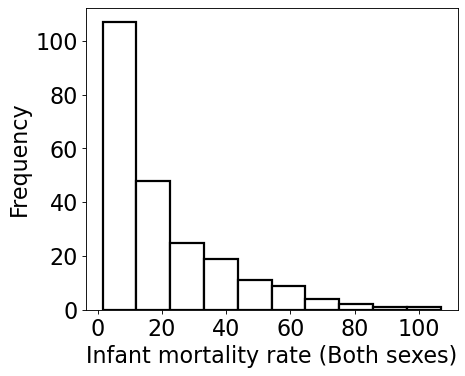

In [8]:
# Visualize the data for infant mortality rate for both sexes
plt.figure(figsize=(8, 10), dpi=80)
fig_IMR = data_from_year_2021['Infant_Mortality_Rate_Both_Sexes'].plot(kind='hist', figsize=(6, 5), linewidth=2, color ="white", edgecolor='black', fontsize=20)
plt.xlabel("Infant mortality rate (Both sexes)", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
#plt.title("Infant mortality rate (Both sexes)", y=1.012, fontsize=30);
plt.show()
fig_IMR.figure.savefig('Plots/Hist_Infant_Mortality_Rate_Both_Sexes.pdf')

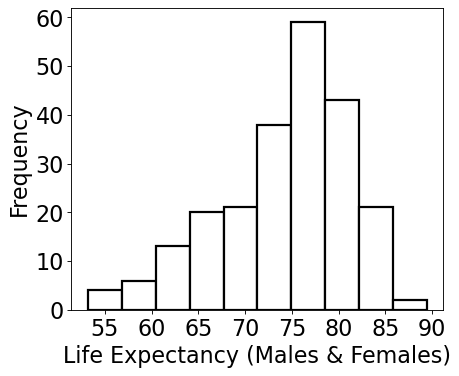

In [9]:
# Visualize the data for life expectancy rate of both sexes (males and females)
plt.figure(figsize=(8, 10), dpi=80)
fig_LE_Both = data_from_year_2021['Life_Expectancy_Both_Sexes'].plot(kind='hist', figsize=(6, 5), linewidth=2, color='white', edgecolor='black', fontsize=20)
plt.xlabel("Life Expectancy (Males & Females)", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
#plt.title("Distribution of Life Expectancy (Males & Females)", y=1.012, fontsize=20);
plt.show()
fig_LE_Both.figure.savefig('Plots/Hist_Life_Expectancy_Both_Sexes.pdf')

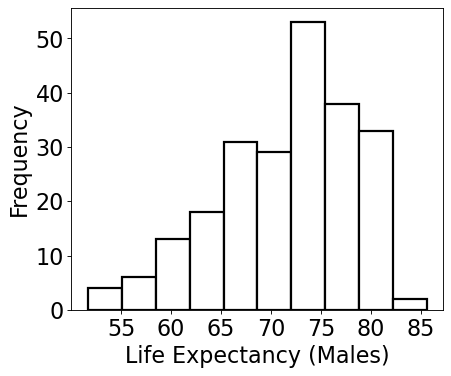

In [10]:
# Visualize the data for life expentency rate of males
plt.figure(figsize=(8, 10), dpi=80)
fig_LE_Males = data_from_year_2021['Life_Expectancy_Males'].plot(kind='hist', figsize=(6, 5), linewidth=2, color='white', edgecolor='black', fontsize=20)
plt.xlabel("Life Expectancy (Males)", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
#plt.title("Distribution of Life Expectancy (Males)", y=1.012, fontsize=20);
plt.show()
fig_LE_Males.figure.savefig('Plots/Hist_Life_Expectancy_Males.pdf')

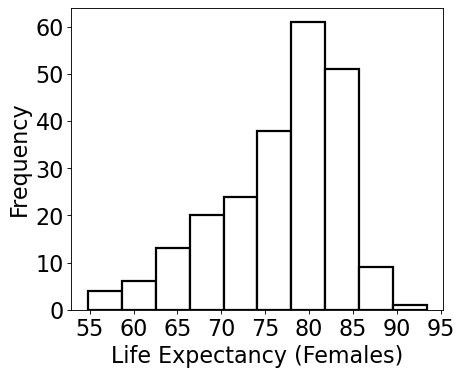

In [11]:
# Visualize the data for life expectency rate of females
plt.figure(figsize=(8, 10), dpi=80)
fig_LE_Females = data_from_year_2021['Life_Expectancy_Females'].plot(kind='hist', figsize=(6, 5), linewidth=2, color='white', edgecolor='black', fontsize=20)
plt.xlabel("Life Expectancy (Females)", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
#plt.title("Distribution of Life Expectancy (Females)", y=1.012, fontsize=20);
plt.show()
fig_LE_Females.figure.savefig('Plots/Hist_Life_Expectancy_Females.pdf', dpi=300)

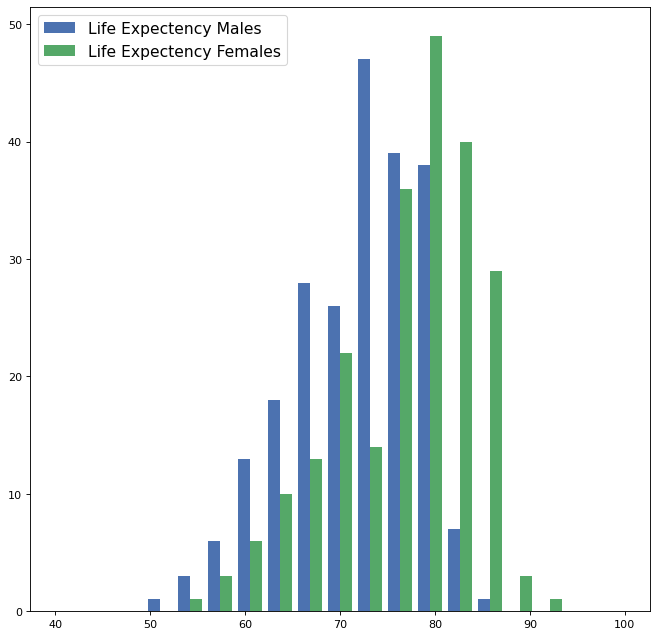

<Figure size 432x288 with 0 Axes>

In [12]:
# Compare the life expectancy of males and females
plt.style.use('seaborn-deep')
xt = data_from_year_2021['Life_Expectancy_Males']
yt = data_from_year_2021['Life_Expectancy_Females']
bins = np.linspace(40,100,20)
plt.figure(figsize=(10, 10), dpi=80)
sns_hist_total = plt.hist([xt,yt], bins, label=['Life Expectency Males','Life Expectency Females'])
plt.legend(loc=2, prop={'size': 14})
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=20) # fontsize of the tick labels
plt.rc('ytick', labelsize=20) 
plt.show()
plt.savefig('Plots/Hist_LE_Males_VS_LE_Females.pdf')

### 2. Analysis of Correlation

In [13]:
# Calculating Pearson Correlation coefficient between four continuous variables
round(data_from_year_2021.corr(method='pearson'), 2)

,Year,Life_Expectancy_Both_Sexes,Life_Expectancy_Males,Life_Expectancy_Females,Infant_Mortality_Rate_Both_Sexes
Year,NaN,NaN,NaN,NaN,NaN
Life_Expectancy_Both_Sexes,NaN,1.00,0.99,0.99,-0.90
Life_Expectancy_Males,NaN,0.99,1.00,0.97,-0.88
Life_Expectancy_Females,NaN,0.99,0.97,1.00,-0.91
Infant_Mortality_Rate_Both_Sexes,NaN,-0.90,-0.88,-0.91,1.00


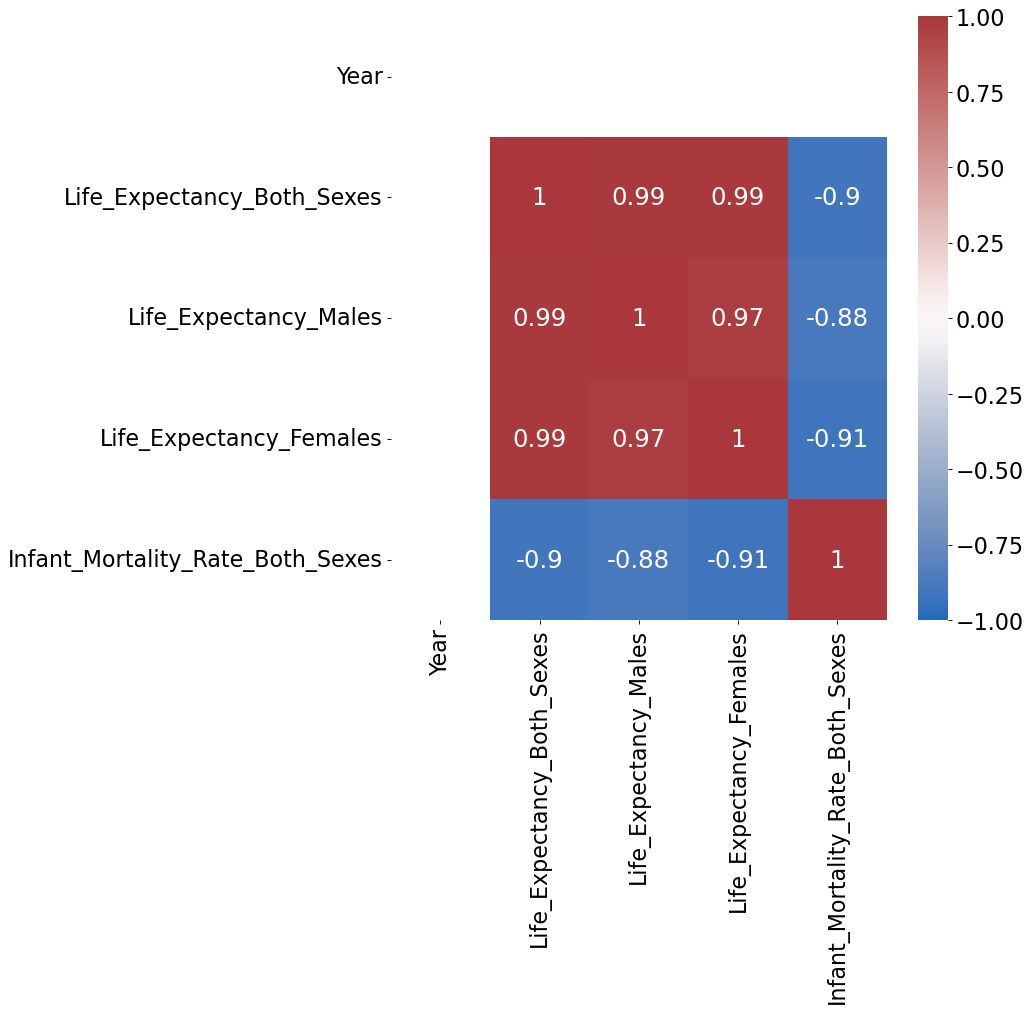

<Figure size 432x288 with 0 Axes>

In [14]:
# Calculating Pearson Correlation coefficient between four continuous variables
# Visualize for better way in a heatmap
plt.figure(figsize=(10, 10), dpi=80)
matrix = data_from_year_2021.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig('Plots/Heat_Map_Pearson_Correlation.pdf')

<Figure size 1000x1000 with 0 Axes>

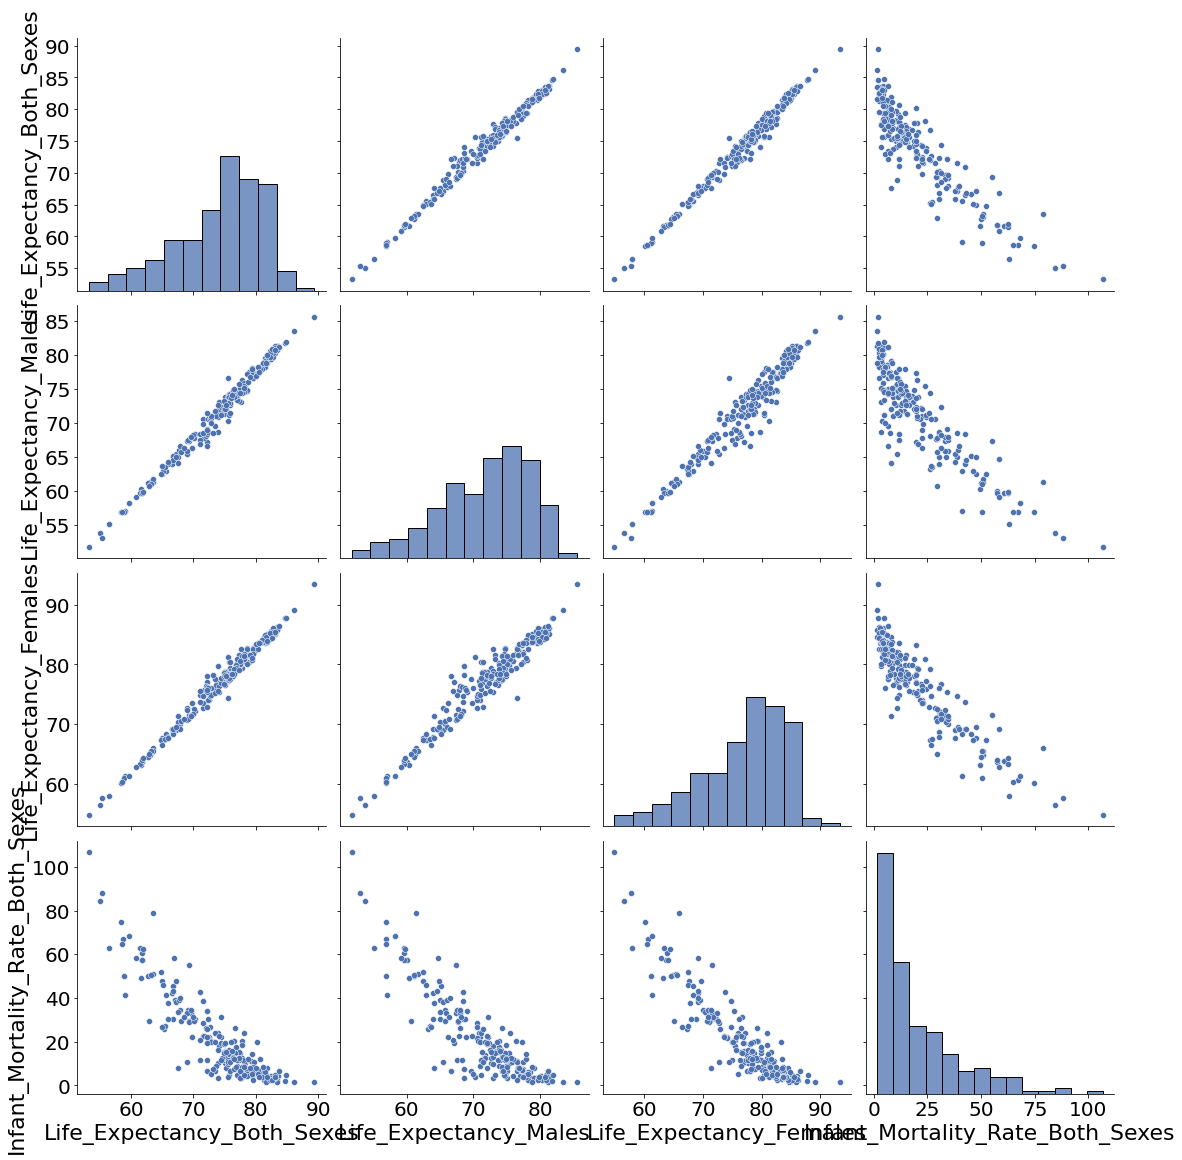

In [15]:
plt.figure(figsize=(10, 10), dpi=100)
cols_to_plot = data_from_year_2021.columns[4:8].tolist()
sns_pair = sns.pairplot(data_from_year_2021[cols_to_plot], size=4)
sns.set_context("paper", rc={"axes.labelsize":16})
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) 
sns_pair.savefig('Plots/Pairplot_Four_Variables.pdf')

### 3. Variable’s value comparison

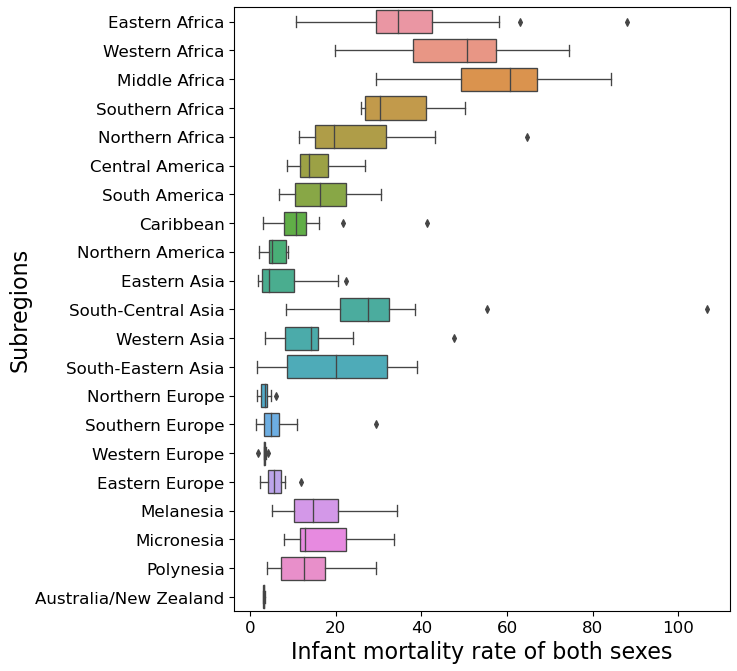

<Figure size 432x288 with 0 Axes>

In [16]:
# Boxplots for describing the data for subregions - Infant mortality rate for both sexes
plt.figure(figsize=(8, 10), dpi=80)
ax = sns.boxplot(x='Infant_Mortality_Rate_Both_Sexes', y='Subregion', data=data_from_year_2021.sort_values(by="Region"))
plt.xlabel("Infant mortality rate of both sexes", fontsize=20)
plt.ylabel("Subregions", fontsize=20)
plt.show()
plt.savefig('Plots/Boxplot_Infant_Mortality_Rate_Both_Sexes.pdf')

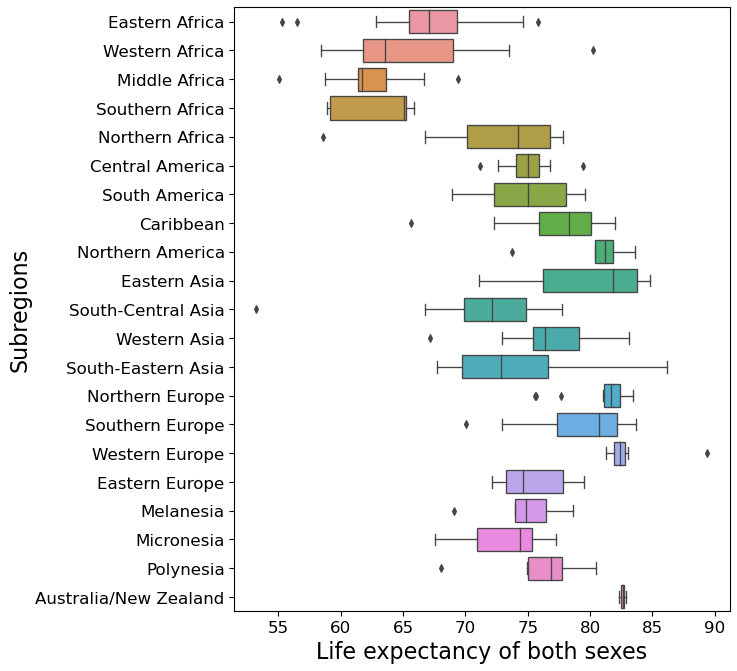

<Figure size 432x288 with 0 Axes>

In [17]:
# Boxplots for describing the data for subregions - Life expectancy of both sexes
plt.figure(figsize=(8, 10), dpi=80)
ax = sns.boxplot(x='Life_Expectancy_Both_Sexes', y='Subregion', data=data_from_year_2021.sort_values(by="Region"))
plt.xlabel("Life expectancy of both sexes", fontsize=20)
plt.ylabel("Subregions", fontsize=20)
plt.show()
plt.savefig('Plots/Boxplot_Life_Expectancy_Both_Sexes.pdf')

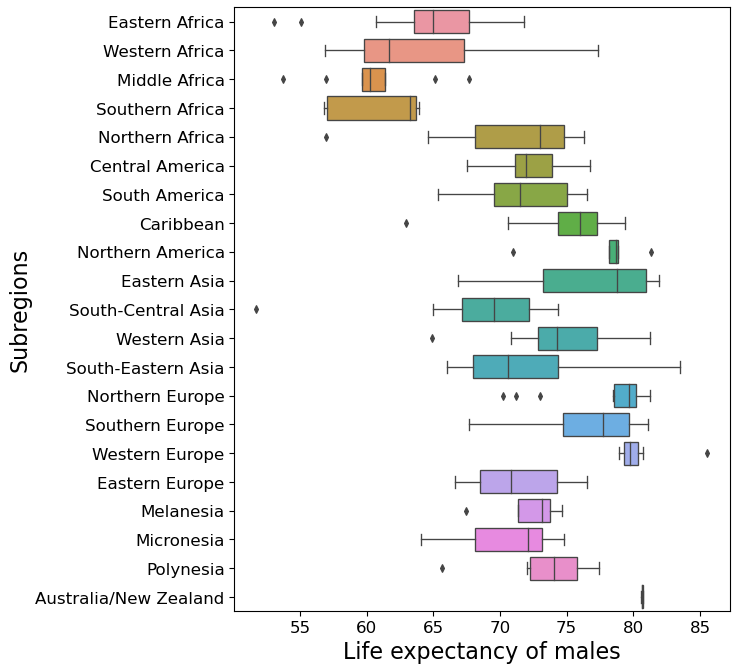

<Figure size 432x288 with 0 Axes>

In [18]:
# Boxplots for describing the data for subregions - Life expectancy of males
plt.figure(figsize=(8, 10), dpi=80)
ax = sns.boxplot(x='Life_Expectancy_Males', y='Subregion', data=data_from_year_2021.sort_values(by="Region"))
plt.xlabel("Life expectancy of males", fontsize=20)
plt.ylabel("Subregions", fontsize=20)
plt.show()
plt.savefig('Plots/Boxplot_Life_Expectancy_Males.pdf')

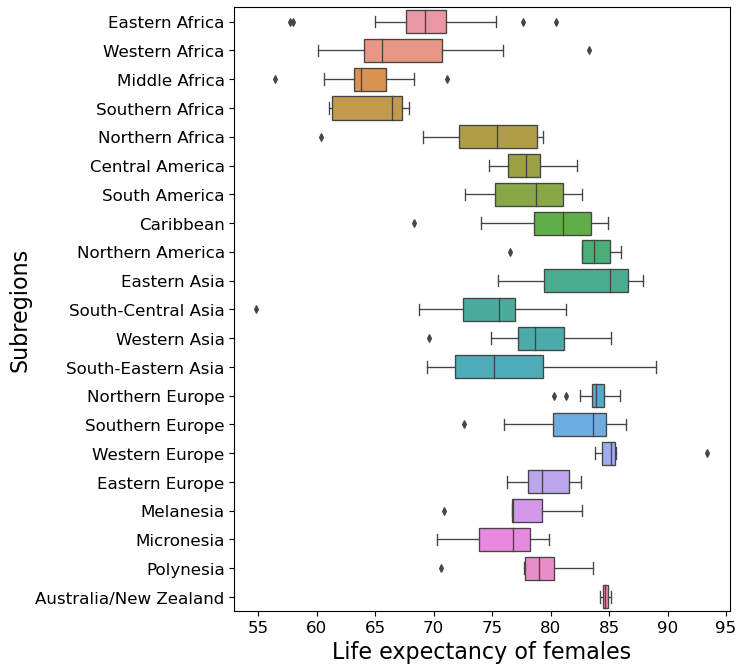

<Figure size 432x288 with 0 Axes>

In [19]:
# Boxplots for describing the data for subregions - Life expectancy of females
plt.figure(figsize=(8, 10), dpi=80)
ax = sns.boxplot(x='Life_Expectancy_Females', y='Subregion', data=data_from_year_2021.sort_values(by="Region"))
plt.xlabel("Life expectancy of females", fontsize=20)
plt.ylabel("Subregions", fontsize=20)
plt.show()
plt.savefig('Plots/Boxplot_Life_Expectancy_Females.pdf')


#### 4. Observing the change in values of the variables over last 20 years (Comparison of the year 2001 with 2021)

In [20]:
# We observe here that the entries in data_from_year_2021 and data_from_year_2001 are not of equal length 
print("Before removing null entries")
print("Size of 2021:" , len(data_from_year_2021))
print("Size of 2001: ", len(data_from_year_2001))

# There are still some null values present in the data from year 2021 so we will remove the null entries fron it
data_2021_filtered = data_from_year_2021[~data_from_year_2021["Country.Name"].isin(countries_to_remove["Country.Name"])]

print("\nAfter removing null entries")
print("Size of 2021:" , len(data_2021_filtered))
print("Size of 2001: ", len(data_from_year_2001))

Before removing null entries
Size of 2021: 227
Size of 2001:  221

After removing null entries
Size of 2021: 221
Size of 2001:  221


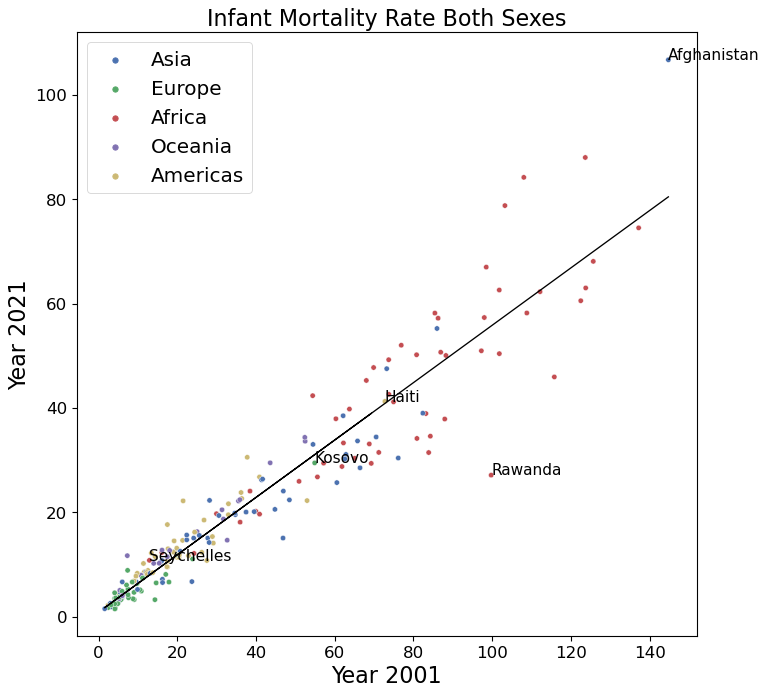

In [44]:
# Infant_Mortality_Rate_Both_Sexes
plt.figure(figsize=(10, 10), dpi=80)
col_name = "Infant_Mortality_Rate_Both_Sexes"
new_df = pd.DataFrame(columns=["2001", "2021", "Region"])
new_df["2001"] = np.array(data_from_year_2001[col_name])
new_df["2021"] = np.array(data_2021_filtered[col_name])
new_df["Region"] = np.array(data_from_year_2001["Region"])
new_df["Country.Name"] = np.array(data_from_year_2001["Country.Name"])
cd = sns.scatterplot(x="2001", y="2021", data=new_df, hue="Region")

#print((new_df.sort_values('2001')).to_string())

# Plotting the regression line using least squares polynomial fit
X = new_df["2001"]
Y = new_df["2021"]
slope, intercept = np.polyfit(X, Y, 1)
plt.plot(X, X*slope + intercept, 'k')

plt.text(144.77, 106.75, "Afghanistan", size="x-large")
plt.text(54.91, 29.51, "Kosovo", size="x-large")
plt.text(12.92, 10.83, "Seychelles", size="x-large")
plt.text(99.75, 27.16, "Rawanda", size="x-large")
plt.text(72.75, 41.29, "Haiti", size="x-large")

plt.xlabel("Year 2001", fontsize=20)
plt.ylabel("Year 2021", fontsize=20)
plt.title("Infant Mortality Rate Both Sexes", fontsize=20)
plt.legend(prop={'size': 18})
plt.show()
#plt.savefig('Plots/Scatter_Infant_Mortality_Rate_Both_Sexes.pdf')

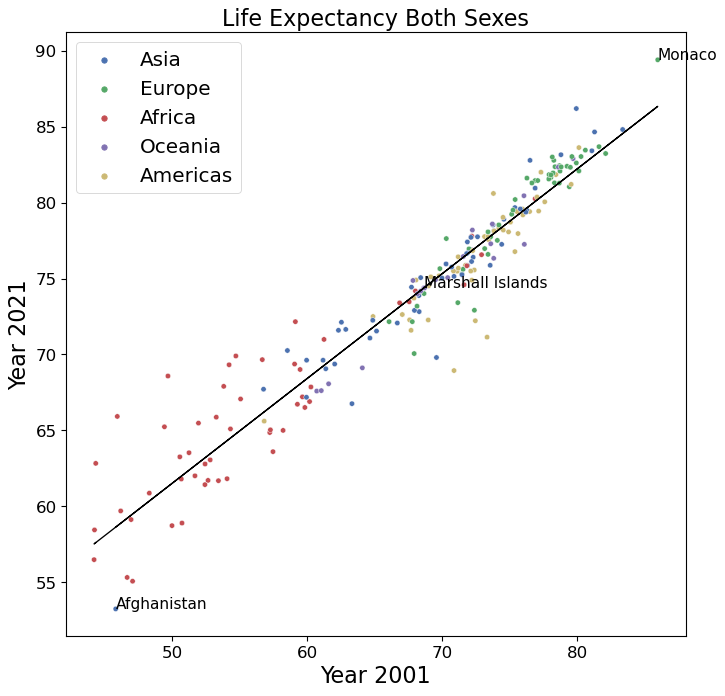

<Figure size 432x288 with 0 Axes>

In [57]:
# Life_Expectancy_Both_Sexes
plt.figure(figsize=(10, 10), dpi=80)
col_name = "Life_Expectancy_Both_Sexes"
new_df = pd.DataFrame(columns=["2001", "2021", "Region"])
new_df["2001"] = np.array(data_from_year_2001[col_name])
new_df["2021"] = np.array(data_2021_filtered[col_name])
new_df["Region"] = np.array(data_from_year_2001["Region"])
new_df["Country.Name"] = np.array(data_from_year_2001["Country.Name"])
cd = sns.scatterplot(x="2001", y="2021", data=new_df, hue="Region")

#print((new_df.sort_values('2001')).to_string())

# Plotting the regression line using least squares polynomial fit
X = new_df["2001"]
Y = new_df["2021"]
slope, intercept = np.polyfit(X, Y, 1)
plt.plot(X, X*slope + intercept, 'k')

# Plot some countries that shows some off/similar trends
plt.text(45.81, 53.25, "Afghanistan", size="x-large")
plt.text(85.96, 89.40, "Monaco", size="x-large")
plt.text(68.63,  74.38, "Marshall Islands", size="x-large")

plt.xlabel("Year 2001", fontsize=20)
plt.ylabel("Year 2021", fontsize=20)
plt.title("Life Expectancy Both Sexes", fontsize=20)
plt.legend(prop={'size': 18})
plt.show()
plt.savefig('Plots/Scatter_Life_Expectancy_Both_Sexes.pdf')

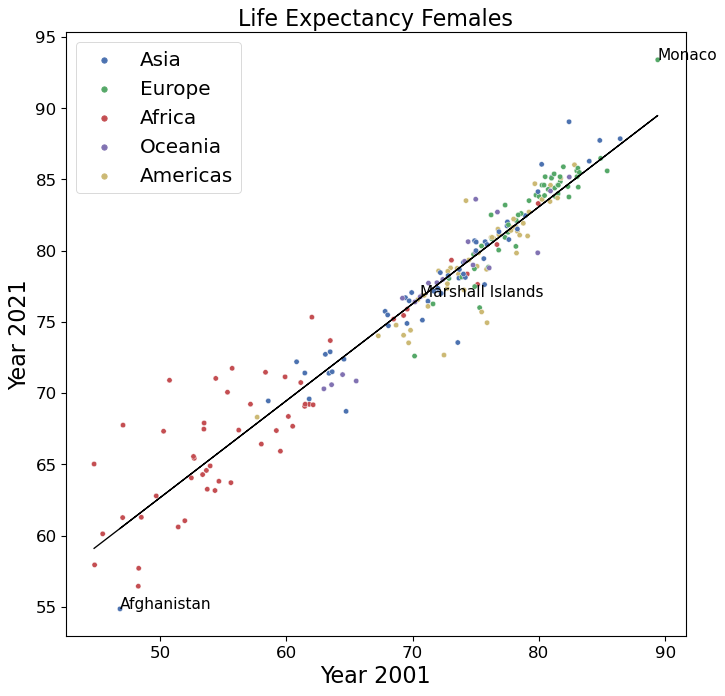

<Figure size 432x288 with 0 Axes>

In [60]:
# Life_Expectancy_Females
plt.figure(figsize=(10, 10), dpi=80)
col_name = "Life_Expectancy_Females"
new_df = pd.DataFrame(columns=["2001", "2021", "Region"])
new_df["2001"] = np.array(data_from_year_2001[col_name])
new_df["2021"] = np.array(data_2021_filtered[col_name])
new_df["Region"] = np.array(data_from_year_2001["Region"])
new_df["Country.Name"] = np.array(data_from_year_2001["Country.Name"])
cd = sns.scatterplot(x="2001", y="2021", data=new_df, hue="Region")

#print((new_df.sort_values('2001')).to_string())

# Plotting the regression line using least squares polynomial fit
X = new_df["2001"]
Y = new_df["2021"]
slope, intercept = np.polyfit(X, Y, 1)
plt.plot(X, X*slope + intercept, 'k')

# Plot some countries that shows some off/similar trends
plt.text(46.83, 54.85, "Afghanistan", size="x-large")
plt.text(89.40, 93.40, "Monaco", size="x-large")
plt.text(70.60, 76.76, "Marshall Islands", size="x-large")

plt.xlabel("Year 2001", fontsize=20)
plt.ylabel("Year 2021", fontsize=20)
plt.title("Life Expectancy Females", fontsize=20)
plt.legend(prop={'size': 18})
plt.show()
plt.savefig('Plots/Scatter_Life_Expectancy_Females.pdf')

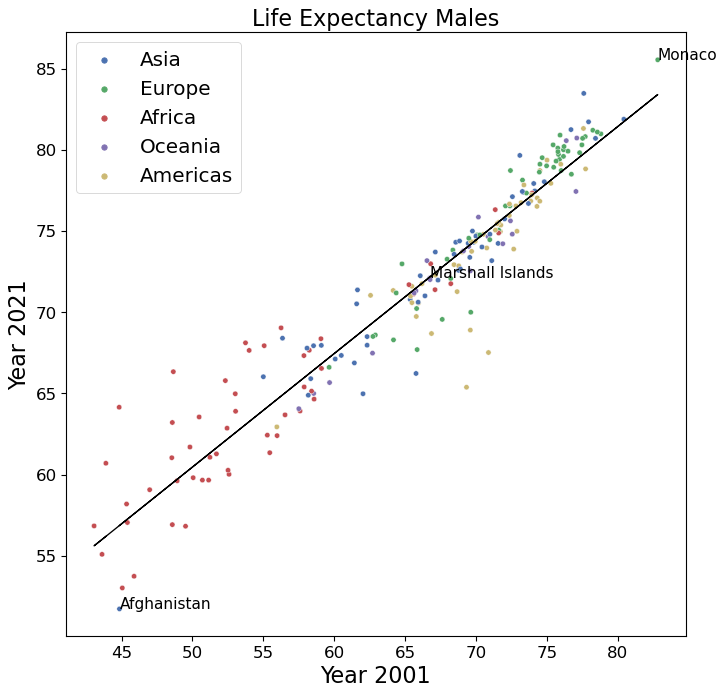

<Figure size 432x288 with 0 Axes>

In [62]:
# Life_Expectancy_Males
plt.figure(figsize=(10, 10), dpi=80)
col_name = "Life_Expectancy_Males"
new_df = pd.DataFrame(columns=["2001", "2021", "Region"])
new_df["2001"] = np.array(data_from_year_2001[col_name])
new_df["2021"] = np.array(data_2021_filtered[col_name])
new_df["Region"] = np.array(data_from_year_2001["Region"])
new_df["Country.Name"] = np.array(data_from_year_2001["Country.Name"])
cd = sns.scatterplot(x="2001", y="2021", data=new_df, hue="Region")

#print((new_df.sort_values('2001')).to_string())

# Plotting the regression line using least squares polynomial fit
X = new_df["2001"]
Y = new_df["2021"]
slope, intercept = np.polyfit(X, Y, 1)
plt.plot(X, X*slope + intercept, 'k')

# Plot some countries that shows some off/similar trends
plt.text(44.85,  51.73, "Afghanistan", size="x-large")
plt.text(82.82,  85.55, "Monaco", size="x-large")
plt.text(66.76,  72.12, "Marshall Islands", size="x-large")

plt.xlabel("Year 2001", fontsize=20)
plt.ylabel("Year 2021", fontsize=20)
plt.title("Life Expectancy Males", fontsize=20)
plt.legend(prop={'size': 18})
plt.show()
plt.savefig('Plots/Scatter_Life_Expectancy_Males.pdf')